# Exploratory Data Analysis of Global Suicide Dataset

* **Dataset Source**: https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016

* **Dataset Description**: This dataset `suicide_data.csv` compares socio-economic factors with suicide rates across different years and countries.

* **Objective**: This notebook aims to conduct an exploratory data analysis and data cleaning on global suicide data. The goal is to prepare the dataset for dashboard development, focusing on analyzing suicide rates by year, gender, age group, country, and identifying potential contributing factors.

In [23]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Load the suicide dataset from ‘suicide_data.csv’
df = pd.read_csv('suicide_data.csv')

Load the file named `suicide_data.csv` to prepare the data needed for EDA.

In [25]:
# Display the first 5 rows to get an overview
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


* Display the first 5 rows of the DataFrame. The table includes columns such as `country`, `year`, `sex`, `age`, and `suicides_no`, among others.
* We can see that some columns contain missing values.

In [26]:
# Show the number of rows and columns of the dataset
df.shape

(27820, 12)

Check the shape of the dataset. It contains 27,820 rows and 12 columns.

In [27]:
# Display summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


* The dataset contains 27,820 records and 12 columns.
* There are three data types in the dataset: `object`, `int64`, and `float64`.
* The `HDI for year` column only has 8,364 non-null values, which may limit its use in analysis.
* The `gdp_for_year ($)` is stored as a string, which may require conversion to a numeric data type.

In [28]:
# Check for missing values
missing_value = df.isna().sum()
# Print the number of missing values per column
print("Number of missing values per column: ")
print(missing_value)

Number of missing values per column: 
country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


We can see once again that only the `HDI for year` column contains a large amount of missing data, so it is clear that we need to drop this column before proceeding with the analysis.

In [29]:
# Drop columns that are not needed for the analysis
df = df.drop(['HDI for year', 'country-year'], axis=1)
# Display the first 5 rows of the modified DataFrame
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


* We drop the columns that are not necessary for the analysis: `HDI for year` and `country-year`.

* After removing these columns, the first 5 rows of the modified DataFrame are displayed to show the updated data structure.

In [30]:
# Remove leading and trailing spaces
df.columns = df.columns.str.strip()
# Display the first 5 rows of the modified DataFrame
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


* We remove any leading and trailing spaces from the column names by using `str.strip()`.

* After cleaning the column names, we display the first five rows of the updated DataFrame.

In [31]:
# Remove commas and convert to float for 'gdp_for_year ($)' column
df['gdp_for_year ($)'] = df['gdp_for_year ($)'].str.replace(',', '').astype(float)
# Remove 'years' suffix from 'age' column
df['age'] = df['age'].str.replace(' years', '', regex=False)
# Display the first 5 rows of the modified DataFrame
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24,21,312900,6.71,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,2.156625e+09,796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,2.156625e+09,796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,2.156625e+09,796,Boomers


* We remove commas from the `gdp_for_year ($)` column and convert it from a string to a float, so that numerical operations can be performed on it.

* We also clean the `age` column by removing the `years` suffix.

* We display the first 5 rows of the modified DataFrame to verify the changes.

In [32]:
# Print the unique values for each categorical column to check for consistency and potential typos
categorical_cols = ['country', 'sex', 'age', 'generation']
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'country':
['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' '

* We print the unique values of all columns to check for any potential misspellings.
* By checking the data, we found a spelling error in the `generation` column: the word `Millenials` was misspelled.

In [33]:
# Correct a typo in the 'generation' column: replace 'Millenials' with 'Millennials'
df['generation'] = df['generation'].replace('Millenials', 'Millennials')
# Print unique values in the 'generation' column again to confirm the correction
print(df['generation'].unique())

['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millennials'
 'Generation Z']


We correct a typo in the `generation` column by replacing `Millenials` with `Millennials`.

In [34]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


We check for duplicate rows and the result shows that there are no duplicate rows in the dataset.

In [35]:
# Remove rows where 'suicides_no' is negative
df = df[df["suicides_no"] >= 0]
df = df[df["suicides/100k pop"] >= 0]

We remove any rows where the values in the `suicides_no` or `suicides/100k pop` columns are negative, as negative suicide counts are not valid.

In [36]:
# Display the first 5 rows of the dataset
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24,21,312900,6.71,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,2.156625e+09,796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,2.156625e+09,796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,2.156625e+09,796,Boomers


We display the first five rows of the modified DataFrame to verify the changes.

In [37]:
# Get descriptive statistics for the 'suicides/100k pop' column to understand its distribution
print(df['suicides/100k pop'].describe())

count    27820.000000
mean        12.816097
std         18.961511
min          0.000000
25%          0.920000
50%          5.990000
75%         16.620000
max        224.970000
Name: suicides/100k pop, dtype: float64


* We get descriptive statistics for the `suicides/100k pop` column, allowing us to understand the distribution of suicide rates per 100,000 people.

* The data is not normally distributed, indicating that while most countries have relatively low suicide rates, there are a few outliers with significantly higher rates.

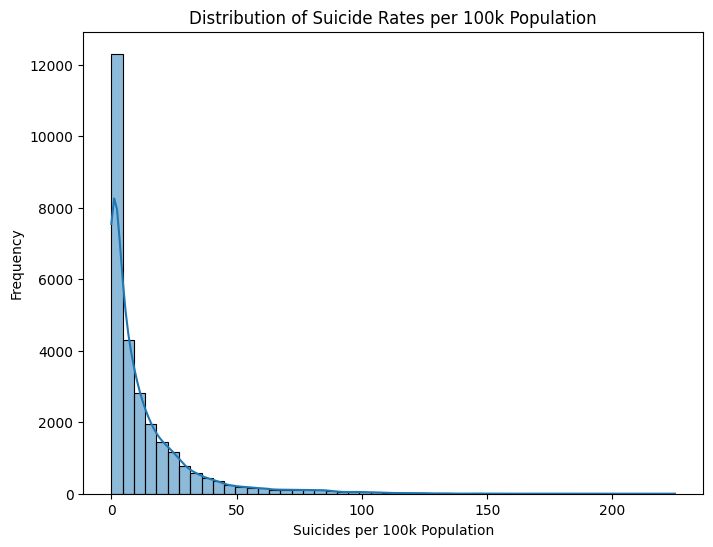

In [38]:
# Plot a histogram to visualize the distribution of suicide rates per 100k population.
# This helps identify the shape and spread of the data.
plt.figure(figsize=(8, 6))
sns.histplot(df['suicides/100k pop'], kde=True, bins=50)
plt.title('Distribution of Suicide Rates per 100k Population')
plt.xlabel('Suicides per 100k Population')
plt.ylabel('Frequency')
plt.show()

The distribution of suicide rates is right-skewed, with most values clustered near zero, indicating that high suicide rates are relatively rare.

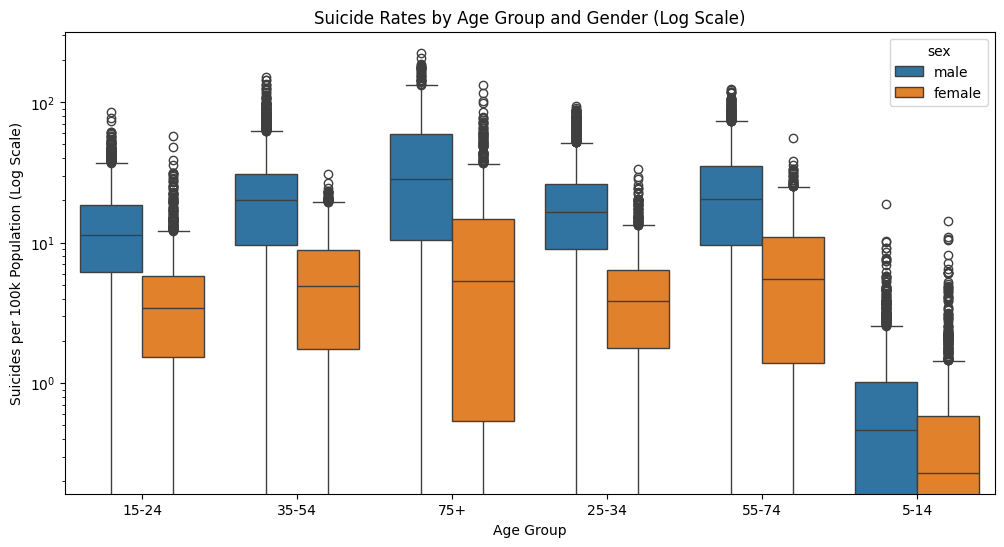

In [39]:
# Set plot size
plt.figure(figsize=(12, 6))
# Create box plot of suicide rates by age and sex
sns.boxplot(data=df, x='age', y='suicides/100k pop', hue='sex')

# Use a log scale for the y-axis to better show distribution
plt.yscale('log')

plt.title('Suicide Rates by Age Group and Gender (Log Scale)')
plt.xlabel('Age Group')
plt.ylabel('Suicides per 100k Population (Log Scale)')
plt.show()

* This box plot displays the suicide rates per 100,000 people across different age groups, with a distinction made between genders.

* It shows the outlier points within each group.

* This box plot highlights the significant differences in suicide rates across different genders and age groups. Men and the elderly are generally considered to be higher-risk groups for suicide.

* The data for suicides per 100k population is often not normally distributed, so there is no need to process the outliers.

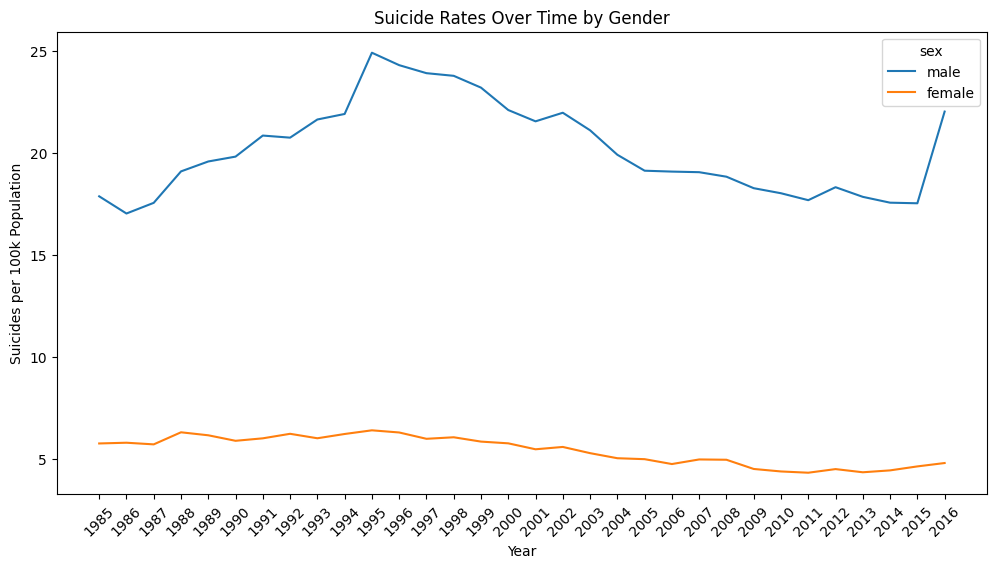

In [40]:
# Plot a line chart showing the trend of suicide rates over time, separated by gender
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='suicides/100k pop', hue='sex', errorbar=None)
plt.title('Suicide Rates Over Time by Gender')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.xticks(ticks=range(df['year'].min(), df['year'].max() + 1), rotation=45)
plt.show()

* This line chart shows the trend of suicide rates over time for different genders.

* Overall, the male suicide rate is significantly higher than the female suicide rate throughout the entire period.

* The male suicide rate shows an upward trend from around 1985 to 1995, reaching a peak in 1995, while the female suicide rate remains relatively stable and stays at a lower level throughout the period.

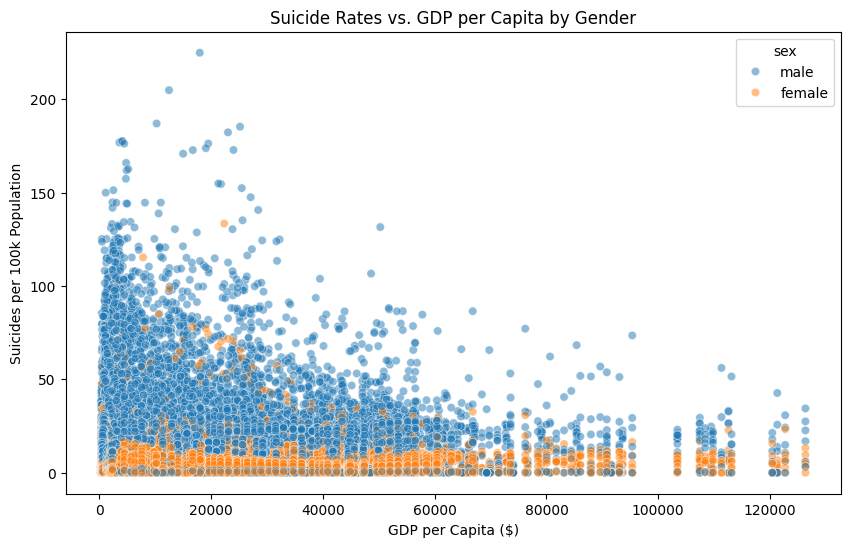

In [41]:
# Create a scatter plot to show the relationship between GDP per capita and suicide rates per 100,000 people.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gdp_per_capita ($)', y='suicides/100k pop', hue='sex', alpha=0.5)
plt.title('Suicide Rates vs. GDP per Capita by Gender')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicides per 100k Population')
plt.show()

There is no clear linear relationship, but males in lower GDP countries tend to have higher suicide rates.

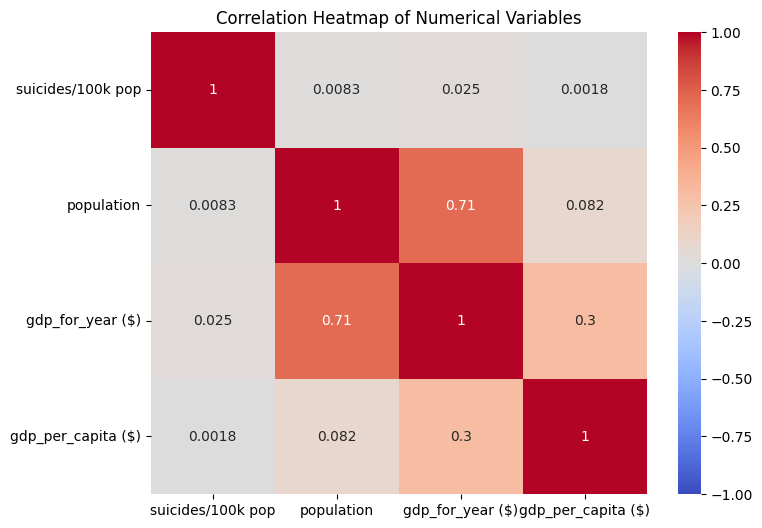

In [42]:
# Create a heatmap to visualize the correlation between numerical variables.
plt.figure(figsize=(8, 6))
correlation_matrix = df[['suicides/100k pop', 'population', 'gdp_for_year ($)', 'gdp_per_capita ($)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

From the heatmap, we can see that the relationships between population, GDP, and GDP per capita with suicide rates are all relatively weak, showing no clear linear correlation.

In [43]:
# Display info to confirm data types after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   gdp_for_year ($)    27820 non-null  float64
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 2.1+ MB


* We use `df.info()` to confirm the data types of the columns after cleaning.
* After cleaning, the dataset no longer has any missing values, and the data types are now consistent for analysis.

In [44]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_suicide_data.csv', index=False)
# Print a confirmation message
print("Dataset saved as cleaned_suicide_data.csv")

Dataset saved as cleaned_suicide_data.csv


* We save the cleaned DataFrame to a new CSV file named `cleaned_suicide_data.csv`.
* A confirmation message is printed to indicate that the cleaned dataset has been successfully saved.